In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
sp500 = pd.read_csv('SPX.csv')

In [4]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date',inplace = True)


In [5]:
sp500 = sp500['20000101':'20140414']

In [6]:
sp500['42d'] = np.round(pd.rolling_mean(sp500['Adj Close'], window = 42),2) #2 month MA
sp500['252d'] = np.round(pd.rolling_mean(sp500['Adj Close'], window = 252),2) #one year Ma 

C:\Users\xexx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=42,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Users\xexx\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).mean()
  


In [7]:
sp500[['Adj Close','42d','252d']].tail(10)

,Adj Close,42d,252d
Date,,,
2014-04-01,1885.520020,1841.09,1722.53
2014-04-02,1890.900024,1843.67,1723.87
2014-04-03,1888.770020,1847.17,1725.18
2014-04-04,1865.089966,1849.78,1726.42
2014-04-07,1845.040039,1852.01,1727.53
2014-04-08,1851.959961,1853.88,1728.66
2014-04-09,1872.180054,1855.67,1729.79
2014-04-10,1833.079956,1856.46,1730.74
2014-04-11,1815.689941,1856.36,1731.64


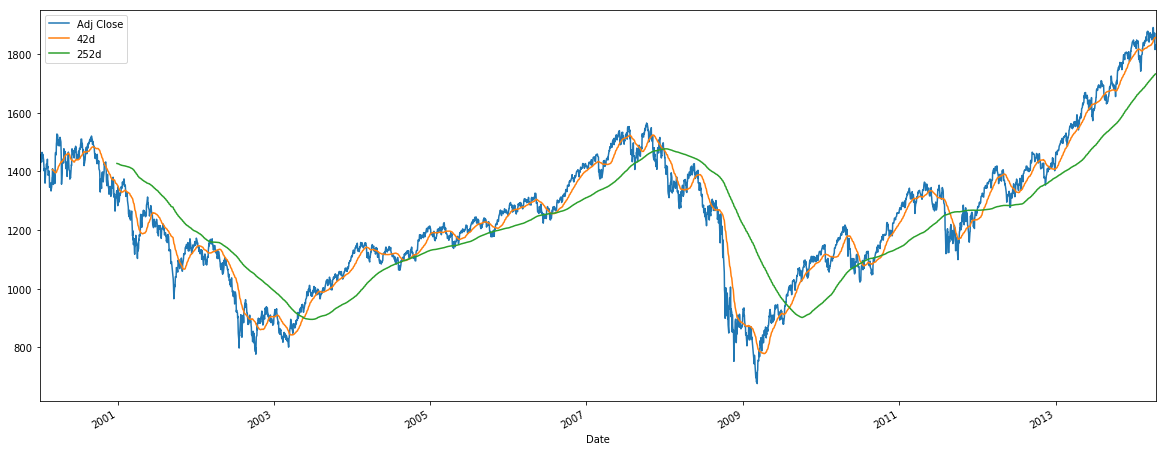

In [8]:
sp500[['Adj Close','42d','252d']].plot(figsize = (20,8))

In [9]:
'''
Buy signal (go long)
the 42d trend is for the first time SD points above the 252d trend.
Wait (park in cash)
the 42d trend is within a range of +/– SD points around the 252d trend.
Sell signal (go short)
the 42d trend is for the first time SD points below the 252d trend.
'''

'\nBuy signal (go long)\nthe 42d trend is for the first time SD points above the 252d trend.\nWait (park in cash)\nthe 42d trend is within a range of +/– SD points around the 252d trend.\nSell signal (go short)\nthe 42d trend is for the first time SD points below the 252d trend.\n'

In [10]:
sp500['42-252'] = sp500['42d'] - sp500['252d']

In [11]:
SD = 50

In [12]:
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    1489
 0    1232
-1     871
Name: Regime, dtype: int64

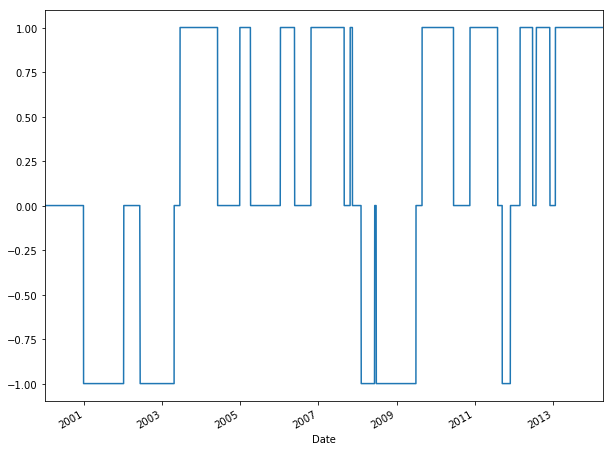

In [14]:
sp500['Regime'].plot(lw = 1.5, figsize = (10,8))


In [15]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

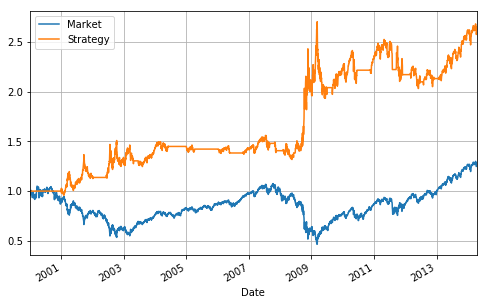

In [16]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,
figsize=(8, 5))